### Adiciona aqui o seu diretorio base do projeto

In [1]:
import sys
project_root_dir = r'C:\Users\paulo\PycharmProjects\ETL-CVM'
sys.path.append(project_root_dir)

### Importando as bibliotecas do projeto

In [2]:
import pandas as pd
from src.scrapers.cvm_scrapper import CvmScrapper
from src.soups.soup_generator import Soup

# Rotina de scraping

### Rotina para os dados anteriores ao ano de 2021

Os links para os arquivos estão nas tags ***a*** contendo a refêcial final para o arquivo zip, como pode ser observado na imagem.

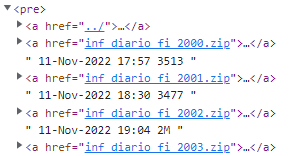

Portanto, é necessário obter o objeto *Soup* previamente configurado para ser mais facil trabalhar com esse html:

In [3]:
configured_soup = Soup('https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/')
cvm_scraper = CvmScrapper(configured_soup)

Dentro da pagína *https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/* pode-se encontrar o link direto para arquivos de 2021 e 2022 e o link para outro diretorio, chamado HIST que contém os dados de 2000 até 2020

Utilizando o objeto scaper, configurado com o Soup desta página é removido todos os links e em seguida filtrado apenas o link para o diretorio com os dados de 2000 até 2020.

In [4]:
links_from_cvm_page = cvm_scraper.get_all_links()

In [5]:
hist_link = cvm_scraper.filter_links(["HIST"])

In [6]:
configured_soup_hist = Soup(hist_link)

In [7]:
cvm_scraper_hist = CvmScrapper(configured_soup_hist)

In [8]:
links_from_cvm_page_hist = cvm_scraper.get_all_links()

Os links para o download dos arquivos zip são armazenados em uma lista:

In [9]:
zip_file_links_hist = cvm_scraper_hist.filter_links(["inf_diario_fi_"])

### Trabalhando com os arquivos *zip*

Cada arquivo *zip* contém arquivos *.csv* com dados mensais. O que torna necessário descompactá-los para posterior concatenação em um único dataframe.

Feito isso, utilizando duas funções, primeiramente o arquivo zip é carregado a partir do site e após isso todos os seus csv são transformado e agregados em apenas um dataframe.

Esse procedimento é feito para todos os links dessa página, gerando no final um dataframe com os dados de 2000 até 2020 de todos os messes desses anos agregados em um só.

In [10]:
df_2000_2020 = pd.DataFrame()

for zip_file_link in zip_file_links_hist:
    temp_zip_file = cvm_scraper_hist.load_zip_file_from_url(zip_file_link)
    temp_df = cvm_scraper_hist.generate_data_frame_from_zip_file(temp_zip_file)
    df_2000_2020 = pd.concat([df_2000_2020, temp_df], ignore_index=True)

Processing zip with this files:
['inf_diario_fi_2000.csv']
Processing zip with this files:
['inf_diario_fi_2001.csv']
Processing zip with this files:
['inf_diario_fi_2002.csv']
Processing zip with this files:
['inf_diario_fi_2003.csv']
Processing zip with this files:
['inf_diario_fi_2004.csv']
Processing zip with this files:
['inf_diario_fi_200501.csv', 'inf_diario_fi_200502.csv', 'inf_diario_fi_200503.csv', 'inf_diario_fi_200504.csv', 'inf_diario_fi_200505.csv', 'inf_diario_fi_200506.csv', 'inf_diario_fi_200507.csv', 'inf_diario_fi_200508.csv', 'inf_diario_fi_200509.csv', 'inf_diario_fi_200510.csv', 'inf_diario_fi_200511.csv', 'inf_diario_fi_200512.csv']
Processing zip with this files:
['inf_diario_fi_200601.csv', 'inf_diario_fi_200602.csv', 'inf_diario_fi_200603.csv', 'inf_diario_fi_200604.csv', 'inf_diario_fi_200605.csv', 'inf_diario_fi_200606.csv', 'inf_diario_fi_200607.csv', 'inf_diario_fi_200608.csv', 'inf_diario_fi_200609.csv', 'inf_diario_fi_200610.csv', 'inf_diario_fi_200611.c

O mesmo processo é feito para a página anterior, que contem os links para os dados de 2021 e 2022

In [11]:
zip_file_links_home = cvm_scraper.filter_links(["inf_diario_fi_"])


In [12]:
df_2021_2022 = pd.DataFrame()

for zip_file_link in zip_file_links_home:
    temp_zip_file = cvm_scraper_hist.load_zip_file_from_url(zip_file_link)
    temp_df = cvm_scraper_hist.generate_data_frame_from_zip_file(temp_zip_file)
    df_2021_2022 = pd.concat([df_2021_2022, temp_df], ignore_index=True)

Processing zip with this files:
['inf_diario_fi_202101.csv']
Processing zip with this files:
['inf_diario_fi_202102.csv']
Processing zip with this files:
['inf_diario_fi_202103.csv']
Processing zip with this files:
['inf_diario_fi_202104.csv']
Processing zip with this files:
['inf_diario_fi_202105.csv']
Processing zip with this files:
['inf_diario_fi_202106.csv']
Processing zip with this files:
['inf_diario_fi_202107.csv']
Processing zip with this files:
['inf_diario_fi_202108.csv']
Processing zip with this files:
['inf_diario_fi_202109.csv']
Processing zip with this files:
['inf_diario_fi_202110.csv']
Processing zip with this files:
['inf_diario_fi_202111.csv']
Processing zip with this files:
['inf_diario_fi_202112.csv']
Processing zip with this files:
['inf_diario_fi_202201.csv']
Processing zip with this files:
['inf_diario_fi_202202.csv']
Processing zip with this files:
['inf_diario_fi_202203.csv']
Processing zip with this files:
['inf_diario_fi_202204.csv']
Processing zip with this

Por fim, os dados de todos os anos são agregados, gerando uma base consolidade pora analise posterior

In [13]:
final_cvm_df = pd.concat([df_2000_2020, df_2021_2022], ignore_index=True)

In [ ]:
final_cvm_df.to_csv(r"C:\Users\paulo\PycharmProjects\ETL-CVM\data\cvm_fi_2000_2022.csv")

In [ ]:
final_cvm_df.to_excel(r"C:\Users\paulo\PycharmProjects\ETL-CVM\data\cvm_fi_2000_2022.csv")